# Lesson 9.02 Introduction to Keras

## Overview

- High-level framework for building neural networks with only a few lines of code

- Front-end layer that depends on TensorFlow as a back-end library to do all its modelling and calculation work

- Industry best practices are built-in

- Default parameter settings in Keras are designed to give you good results in most cases


## Required Packages

Please install `keras` via Command Prompt.

## Preprocess Data

In [1]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *

# Load training data set from CSV file
training_data_df = pd.read_csv("data/sales_data_training.csv")

# Load testing data set from CSV file
test_data_df = pd.read_csv("data/sales_data_test.csv")

# Data needs to be scaled to a small range like 0 to 1 for the neural
# network to work well.
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale both the training inputs and outputs
scaled_training = scaler.fit_transform(training_data_df)
scaled_testing = scaler.transform(test_data_df)

# Print out the adjustment that the scaler applied to the total_earnings column of data i.e. col index = 8
print("Note: total_earnings values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[8], scaler.min_[8]))

# Create new pandas DataFrame objects from the scaled data
scaled_training_df = pd.DataFrame(scaled_training, columns=training_data_df.columns.values)
scaled_testing_df = pd.DataFrame(scaled_testing, columns=test_data_df.columns.values)

# Optional Step: Assuming you need to pass the scaled data to someone else to complete remaining steps
# Save scaled data dataframes to new CSV files
scaled_training_df.to_csv("data/sales_data_training_scaled.csv", index=False)
scaled_testing_df.to_csv("data/sales_data_testing_scaled.csv", index=False)

Note: total_earnings values were scaled by multiplying by 0.0000036968 and adding -0.115913


## Create Model
- When building a Neural Network, we usually do not know in advance how many layers and nodes we should use until we try it and see what gives us the best accuracy with our data set

- You may try to add and change the number of nodes in each layer to find the best accuracy

In [2]:
training_data_df = pd.read_csv("data/sales_data_training_scaled.csv")

X_train_sc = training_data_df.drop('total_earnings', axis=1).values
y_train = training_data_df[['total_earnings']].values

# Define the model
model = Sequential()

# Create input layer of input size of 9 (which is equivalent to the number of features)
# Create first hidden layer with 50 neurons
# As a general rule, you should use 'relu' as your activation function for all hidden layers.
# relu allows you to model more complex non-linear functions
# More details on activation layer at www.tensorflow.org/api_docs/python/tf/keras/activations/relu
model.add(Dense(50, input_dim=9, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

# For all regression problems, your output layer will be 1 neuron with no activation function specified.
# Predicted value for earnings should be a single linear value which aligns with linear activation function 
# when no activation function is specified, it will default to the linear activation function
model.add(Dense(1))

# Since it is a regression problem, we can use MSE as the loss function
# Set optimizer as "adam" since it works well with regression problems, is computationally efficient, 
# works for non-stationary data and requires minimal memory requirements.
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

## Train Model

In [3]:
# Load the separate scaled test data set
test_data_df = pd.read_csv("data/sales_data_test_scaled.csv")

# Store scaled X test values
X_test_sc = test_data_df.drop('total_earnings', axis=1).values

# Store scaled Y test values
y_test_sc = test_data_df[['total_earnings']].values

# Train the model
# More details can be found at www.tensorflow.org/api_docs/python/tf/keras/Model#fit
learning_curve = model.fit(
    # Expected values of X train and Y train
    X_train_sc,
    
    y_train,
    
    # test data sets
    validation_data=(X_test_sc, y_test_sc),
    
    # An epoch is an iteration over the entire x and y data provided
    # Avoid setting epoch value too high since it could lead to overfitting issues
    # Start with 20 and continue increasing the value till the accuracy no longer increases
    epochs=20,
    
    # whether to shuffle the training data before each epoch
    shuffle=True,
    
    # Instructs Keras to print more detailed instructions during training so that we can closely monitor what's going on
    verbose=2
)



# Verbose = 0 to avoid printing full log information if you don't require it
# test_error_rate = model.evaluate(X_test, y_test, verbose=0)

# Keras prints the Neural Network's training accuracy after each epoch / training pass
# print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

Epoch 1/20
32/32 - 1s - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2/20
32/32 - 0s - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/20
32/32 - 0s - loss: 0.0015 - mse: 0.0015 - val_loss: 9.2201e-04 - val_mse: 9.2201e-04
Epoch 4/20
32/32 - 0s - loss: 6.9098e-04 - mse: 6.9098e-04 - val_loss: 4.5363e-04 - val_mse: 4.5363e-04
Epoch 5/20
32/32 - 0s - loss: 4.0236e-04 - mse: 4.0236e-04 - val_loss: 3.1930e-04 - val_mse: 3.1930e-04
Epoch 6/20
32/32 - 0s - loss: 2.6088e-04 - mse: 2.6088e-04 - val_loss: 2.2696e-04 - val_mse: 2.2696e-04
Epoch 7/20
32/32 - 0s - loss: 1.9292e-04 - mse: 1.9292e-04 - val_loss: 2.1948e-04 - val_mse: 2.1948e-04
Epoch 8/20
32/32 - 0s - loss: 1.5194e-04 - mse: 1.5194e-04 - val_loss: 1.7349e-04 - val_mse: 1.7349e-04
Epoch 9/20
32/32 - 0s - loss: 1.2371e-04 - mse: 1.2371e-04 - val_loss: 1.5226e-04 - val_mse: 1.5226e-04
Epoch 10/20
32/32 - 0s - loss: 1.0815e-04 - mse: 1.0815e-04 - val_loss: 1.2389e-04 - val_mse: 1.2389e-04

- From the values above, notice that the error rate gets smaller over time
- **Recall** the smaller the error term, the better which means the NN on average is making predictions that are very close to the expected values

## Make Predictions
Neural network is now trained to look at characteristics of video games and predict their future sales based on those characteristics

In [4]:
# Load the data we make to use to make a prediction
X = pd.read_csv("data/proposed_new_product.csv").values

# Make a prediction for a new video game with the trained neural network
prediction = model.predict(X)

# Grab just the first element of the first prediction (since that's the only have one)
prediction = prediction[0][0]

# Re-scale the data from the 0-to-1 range back to dollars
# These constants are from when the data was originally scaled down to the 0-to-1 range
prediction = prediction + 0.1159
prediction = prediction / 0.0000036968

print("Earnings Prediction for Proposed Product - ${}".format(prediction))

Earnings Prediction for Proposed Product - $264606.07736509515


## Visualise Learning Curves
Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

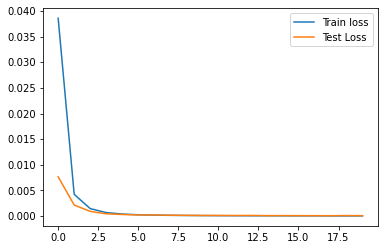

In [5]:
# loss refers to MSE values of train data
# val_loss refers to MSE values of test data
plt.plot(learning_curve.history['loss'], label='Train loss')
plt.plot(learning_curve.history['val_loss'], label='Test Loss')
plt.legend();

## Evaluate Model Performance

In [6]:
# Retrieve model performance score
print(model.evaluate(X_test_sc, y_test_sc))

13/13 [==============================] - 0s 1ms/step - loss: 8.4769e-05 - mse: 8.4769e-05
[8.476923540001735e-05, 8.476923540001735e-05]
